# 논리 회귀
샘플이 특정 클래스에 속할 확률을 추정할 떄 사용  
추정 확률이 50%가 넘으면 해당 클래스에 속한다고 예측, 그 이하면 속하지 않는다고 예측함 : **이진 분류기**  
> 확률을 추정하기 위해 0~1사이 값만 출력하는 **시그모이드 함수**를 이용

## 1. 결정 경계
논리 회귀를 설명하기 위해 붓꽃 데이터를 사용해보겠음  
붓꽃 데이터는 세 개의 품종(세토사, 버지칼라, 버지니카)에 속하는 150개의 꽃잎과 꽃받침의 너비, 길이를 담고 있음

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

일단 버지니카(클래스 2)만 분류하는 분류기를 학습해보겠음

In [9]:
import numpy as np
x = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

True/False를 숫자로 만드는 방법: **astype을 이용** np.int로 변환

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

In [12]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_new)

In [19]:
x_new.shape, y_prob.shape

((1000, 1), (1000, 2))

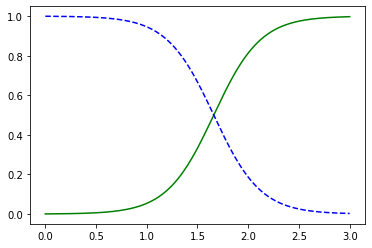

In [22]:
import matplotlib.pyplot as plt

plt.plot(x_new, y_prob[:, 1], "g-", label="Iris virginica")
plt.plot(x_new, y_prob[:, 0], "b--", label="not virginica")
plt.show()

1.6근처에서 결정 경계가 만들어진 것을 확인

In [23]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

경계를 기준으로 조금씩 차이를 준 값을 샘플로 넣었더니 딱 예상한 결과가 나옴

---
## 2. 소프트맥스 회귀
이전에 배운 것처럼 여러 이진 분류기를 학습시켜 연결하는 것이 아니라  
직접 다중 클래스를 지원하도록 일반화할 수 있음. 이를 **소프트맥스 회귀** 라고 함.  
개념은 모델이 각 클래스에 대한 점수를 계산하고 그 점수를 소프트맥스 함수에 통과시켜 각 클래스일 확률을 추정  
  
사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용함.  
그런데 **multi_class** 매개변수를 **"multinomial"** 로 바꾸면 소프트맥스 회귀를 사용할 수 있음.  
소프트맥스 회귀를 사용하려면 **solver** 매개변수에 **lbfgs"** 와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함

---
## 3. 논리 회귀의 학습
선형 회귀는 RMSE를 비용 함수로 정하여 학습함. 그러나 논리 회귀는 RMSE를 비용 함수로 사용하면 convex하지 않아서 학습이 잘 안됨.  
논리 회귀는 **크로스 엔트로피** 를 비용함수로 사용함. 그러면 해당 클래스일 확률이 증가하는 방향으로 학습함

In [24]:
x = iris["data"][:, (2, 3)] # 꽃잎 길이와 꽃잎 너비만 일단 가져와서 학습
y = iris["target"]

In [27]:
x.shape

(150, 2)

In [28]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [29]:
softmax_reg.predict([[5, 2]])

array([2])

In [30]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

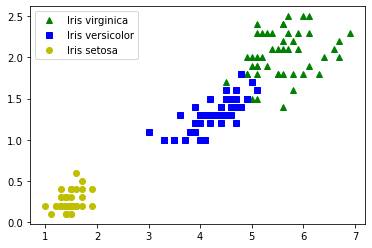

In [42]:
plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris virginica")
plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris setosa")
plt.legend()
plt.show()

numpy 배열로 이루어진 데이터에서 클래스별로 그래프에 나타내는 방법 예시  
>**x[y==2]** 같은 방법이 될 줄은 몰랐음...